No handles with labels found to put in legend.


γ [0.06666667 0.06666667 0.06666667]
β [0.06666667 0.06666667 0.06666667]


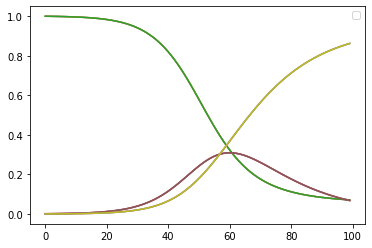

In [10]:
import numpy as np
import matplotlib.pyplot as plt

#基本設定
GROUPS=["A","B","C"]
ONES=np.ones_like(GROUPS, dtype=np.float64)
ZEROS=np.zeros_like(GROUPS, dtype=np.float64)

#SIRモデル定数
R0=1.0
γ=ONES*1/15
β=ONES*R0*γ
print("γ",γ)
print("β",β)

#SIRモデル変数初期値
S=[ONES]
I=[ONES*0.001]
R=[ZEROS]

def calc(s, i ,r):
    #差分の計算
    ds=-β*s*sum(i) #グループに関係なく接触
    #ds=-β*s*i #グループ同士が接触しない
    dr=γ*i
    di=-ds-dr

    #差分を適用した値を返す
    return s+ds, i+di, r+dr

def run(S, I, R, TMAX=100):
    s=S[-1]
    i=I[-1]
    r=R[-1]
    for t in range(1,TMAX):
        s,i,r=calc(s, i, r)
        S.append(s)
        I.append(i)
        R.append(r)
    return S, I, R

S, I, R=run(S, I, R)

plt.plot(S)
plt.plot(I)
plt.plot(R)
plt.legend()
plt.show()